In [49]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [50]:
# Abrimos y cargamos el dataset "ds_salaries.csv" en la variable "df"
df = pd.read_csv("./ds_salaries.csv")
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [52]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [53]:
df.shape

(3755, 11)

In [54]:
# Nos quedamos solo con las 1.000 primeras muestras
df = df.head(1000)

In [55]:
df.shape

(1000, 11)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1000 non-null   int64 
 1   experience_level    1000 non-null   object
 2   employment_type     1000 non-null   object
 3   job_title           1000 non-null   object
 4   salary              1000 non-null   int64 
 5   salary_currency     1000 non-null   object
 6   salary_in_usd       1000 non-null   int64 
 7   employee_residence  1000 non-null   object
 8   remote_ratio        1000 non-null   int64 
 9   company_location    1000 non-null   object
 10  company_size        1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB


In [57]:
# Eliminamos la columna "salary_in_usd"
df = df.drop('salary_in_usd', axis=1)

In [58]:
# Codificamos la variable "job_title"
df["job_code"] = df.job_title.astype("category").cat.codes

In [67]:
df.sample(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size,job_code
532,2023,SE,FT,Data Engineer,165000,USD,US,100,US,M,24
979,2023,SE,FT,Data Science Manager,150000,USD,MX,100,MX,M,32
231,2023,SE,FT,Data Quality Analyst,80000,USD,US,0,US,M,29


In [69]:
# La varibale predictorá X será la columna "job_code" codificada
X = df[["job_code"]] # Simpre poner DOBLE CORCHETE
# La variable objetivo será "salary"
y = df["salary"]

In [70]:
# Instanciamos el modelo de Regresión Lineal 
model = LinearRegression()

## Entrenamos/creamos el modelo
model.fit(X, y)

LinearRegression()

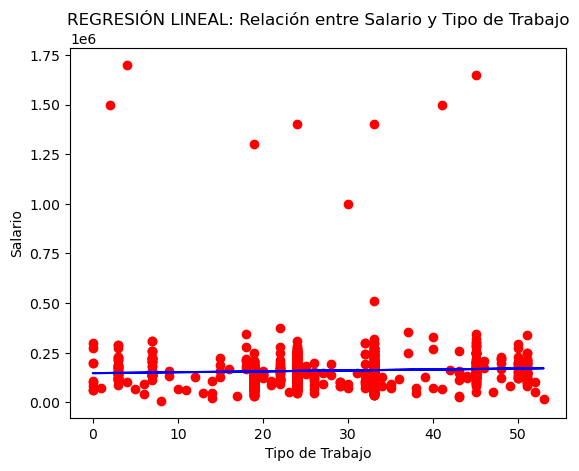

In [62]:
# Crear el scatter plot con X y salary
plt.scatter(X, y, color='red')
predic_Salario = model.predict(X)
plt.plot(X, predic_Salario, color = "blue")
plt.title("REGRESIÓN LINEAL: Relación entre Salario y Tipo de Trabajo")
plt.xlabel("Tipo de Trabajo")
plt.ylabel("Salario")
plt.show()

---
---
---

---
---
---

In [71]:
# Abrimos y cargamos el dataset "ds_salaries.csv" en la variable "df"
df = pd.read_csv("./ds_salaries.csv")
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [72]:
# Nos quedamos solo con las 1.000 primeras muestras
df = df.head(1000)

In [73]:
df.shape

(1000, 11)

In [74]:
# Eliminamos la columna "salary_in_usd"
df = df.drop('salary_in_usd', axis=1)
# Codificamos la variable "job_title"
df["job_code"] = df.job_title.astype("category").cat.codes

In [75]:
# La varibale predictorá X será la columna "job_code" codificada
X = df[["job_code"]] # Simpre poner DOBLE CORCHETE
# La variable objetivo será "salary"
y = df["salary"]

In [76]:
# Instanciamos el modelo de Regresión Lineal 
model_poly = PolynomialFeatures(degree = 2)

## Entrenamos/creamos el modelo
model_poly.fit(X)
X_poly = model_poly.transform(X)

In [77]:
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

LinearRegression()

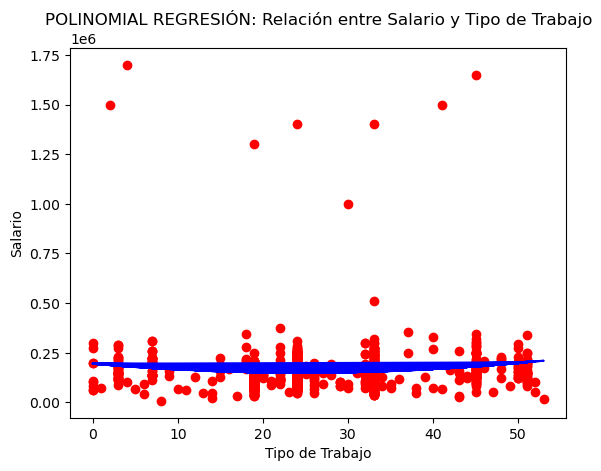

In [81]:
plt.scatter(X, y, color = "red")
predic_Salario = model_poly.predict(X_poly)
plt.plot(X, predic_Salario, color ="blue")
plt.title("POLINOMIAL REGRESIÓN: Relación entre Salario y Tipo de Trabajo")
plt.xlabel("Tipo de Trabajo")
plt.ylabel("Salario")
plt.show()

---
---
---

---
---
---

In [102]:
# Abrimos y cargamos el dataset "ds_salaries.csv" en la variable "df"
df = pd.read_csv("./ds_salaries.csv")

In [103]:
# Nos quedamos solo con las 1.000 primeras muestras
df = df.head(1000)
# Eliminamos la columna "salary_in_usd"
df = df.drop('salary_in_usd', axis=1)
# Codificamos la variable "job_title"
df["job_code"] = df.job_title.astype("category").cat.codes

In [104]:
# La varibale predictorá X será la columna "job_code" codificada
X = df[["job_code"]] # Simpre poner DOBLE CORCHETE
# La variable objetivo será "salary"
y = df["salary"]

In [105]:
# Instanciamos el modelo de Regresión Lineal 
model_poly2 = PolynomialFeatures(degree = 3)

## Entrenamos/creamos el modelo
model_poly2.fit(X)
X_poly2 = model_poly2.transform(X)

In [106]:
model_poly2 = LinearRegression()
model_poly2.fit(X_poly2, y)

LinearRegression()

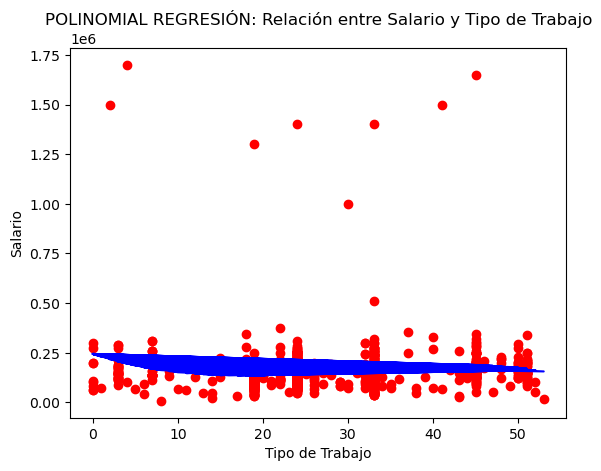

In [107]:
plt.scatter(X, y, color = "red")
predict_Salario = model_poly2.predict(X_poly)
plt.plot(X, predict_Salario, color ="blue")
plt.title("POLINOMIAL REGRESIÓN: Relación entre Salario y Tipo de Trabajo")
plt.xlabel("Tipo de Trabajo")
plt.ylabel("Salario")
plt.show()

---
---
---
---
---
---

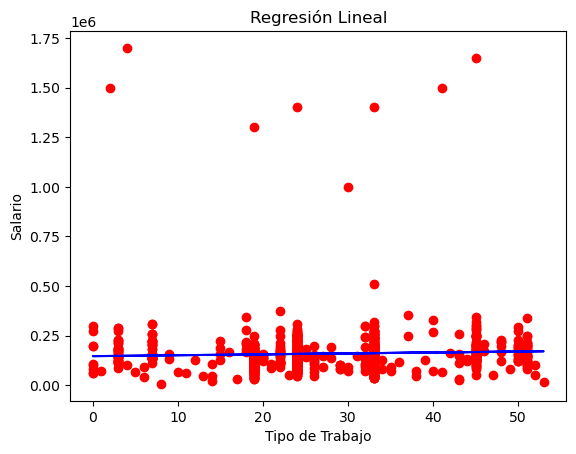

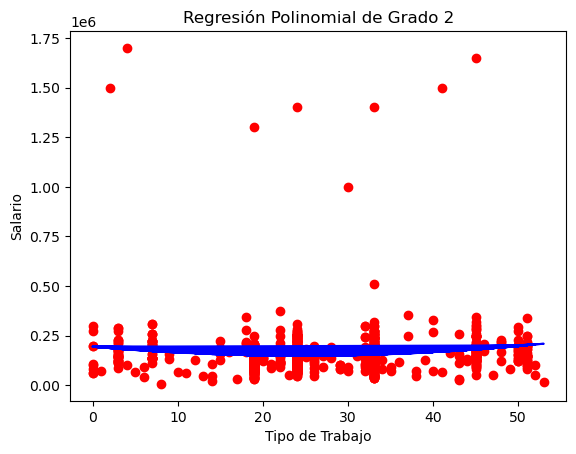

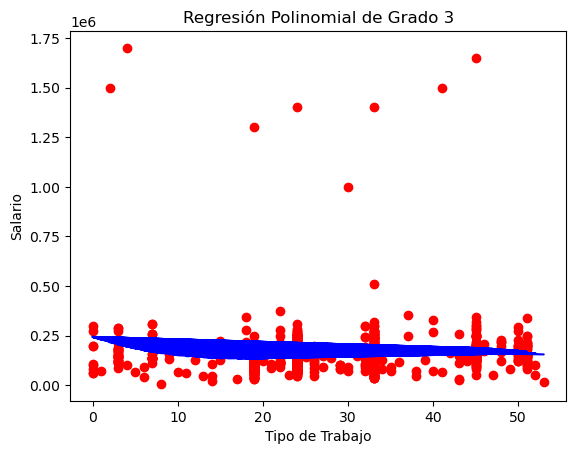

In [114]:
# Diccionario con los distintos modelos
mdls = {
    "Regresión Lineal": LinearRegression(),
    "Regresión Polinomial de Grado 2": PolynomialFeatures(degree = 2),
    "Regresión Polinomial de Grado 3": PolynomialFeatures(degree = 3)
}

# Bucle para ajustar los modelos y generar los gráficos
for nmbr_mdl, mdl in mdls.items():
    if isinstance(mdl, LinearRegression):
        # Si es regresión lineal
        mdl.fit(X, y)
        y_pred = mdl.predict(X)
        plt.scatter(X, y, color = "red")
        plt.plot(X, y_pred, color = "blue")
    elif isinstance(mdl, PolynomialFeatures):
        # Si es regresión polinómica
        X_poly = mdl.fit_transform(X)
        lin_reg = LinearRegression()
        lin_reg.fit(X_poly, y)
        y_pred = lin_reg.predict(X_poly)
        plt.scatter(X, y, color = "red")
        plt.plot(X, y_pred, color = "blue")
   
    plt.xlabel("Tipo de Trabajo")
    plt.ylabel("Salario")
    plt.title(nmbr_mdl)
    plt.show()
